In [85]:
import tensorflow as tf
import pandas as pd
from IPython.display import clear_output
from tensorflow import keras
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("train.csv")
datatest = data[30000:]
datatrain = data[:30000]
ytrain = datatrain.pop("label")
ytest = datatest.pop("label")
ytrain = tf.one_hot(ytrain,depth=10)
ytest = tf.one_hot(ytest,depth=10)
datatrain/=255
datatest/=255

In [87]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])

In [88]:
history = model.fit(datatrain, ytrain,validation_split = 0.1, epochs=100,batch_size=20000)

Epoch 1/100
2/2 [==============================] - 1s 219ms/step - loss: 2.3404 - accuracy: 0.1110 - val_loss: 2.0207 - val_accuracy: 0.3813
Epoch 2/100
2/2 [==============================] - 0s 71ms/step - loss: 1.9764 - accuracy: 0.4267 - val_loss: 1.7252 - val_accuracy: 0.6267
Epoch 3/100
2/2 [==============================] - 0s 77ms/step - loss: 1.6805 - accuracy: 0.6435 - val_loss: 1.4687 - val_accuracy: 0.7140
Epoch 4/100
2/2 [==============================] - 0s 79ms/step - loss: 1.4233 - accuracy: 0.7285 - val_loss: 1.2462 - val_accuracy: 0.7543
Epoch 5/100
2/2 [==============================] - 0s 77ms/step - loss: 1.2030 - accuracy: 0.7656 - val_loss: 1.0613 - val_accuracy: 0.7830
Epoch 6/100
2/2 [==============================] - 0s 161ms/step - loss: 1.0211 - accuracy: 0.7889 - val_loss: 0.9136 - val_accuracy: 0.7990
Epoch 7/100
2/2 [==============================] - 0s 110ms/step - loss: 0.8769 - accuracy: 0.8076 - val_loss: 0.7983 - val_accuracy: 0.8097
Epoch 8/100
2/2 [

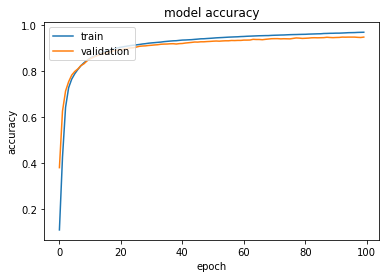

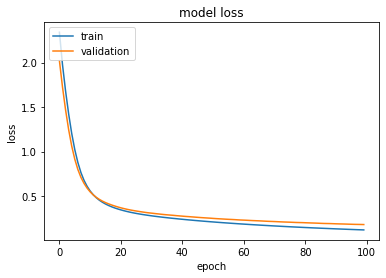

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [90]:

test_loss, test_acc = model.evaluate(datatest,ytest,verbose=1)
print(test_acc)

375/375 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9572
0.9571666717529297


tf.Tensor(3, shape=(), dtype=int64)


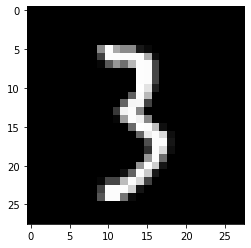

tf.Tensor(2, shape=(), dtype=int64)


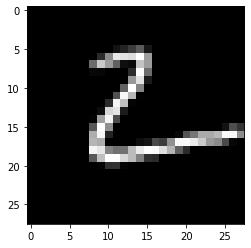

In [108]:
for i in range(234,236):
    image = tf.reshape(datatrain.loc[i],(28,28))
    print(tf.argmax(ytrain[i]))
    plt.gray()
    plt.imshow(image,interpolation="nearest")
    plt.show()

In [109]:
predict = model.predict_on_batch([datatrain.loc[234:235]])
for row in predict:
    print(tf.argmax(row))

tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
